# **Random Forest - Practical Implementation**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
# classification
df_clf = sns.load_dataset('iris')

# regression
df_reg = pd.read_csv('/content/housing.csv')

**Label Encoding**

In [3]:
df_clf['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df_clf['species'] = df_clf['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

**Train Test Split**

In [7]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [8]:
# splitting
# classification
X_clf = df_clf.drop('species', axis=1)
y_clf = df_clf[['species']]

# regression
X_reg = df_reg.drop('MEDV', axis=1)
y_reg = df_reg[['MEDV']]

In [9]:
# classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

# regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

## **Random Forest Implementation**

### **Random Forest Classifier**

In [5]:
# importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

**Training**

In [6]:
rf_clf = RandomForestClassifier()

In [11]:
parameters = {
    'n_estimators': [10, 30, 50, 80, 100, 150, 200, 250],
    'criterion': ['gini', 'entropy', 'logg_loss'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [1, 2, 3, 4, 5, 6]
}
rf_clf_cv = GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5)
rf_clf_cv.fit(X_train_clf, y_train_clf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logg_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [10, 30, 50, 80, 100, 150, 200, 250]},
             scoring='accuracy')

In [12]:
# best parameters
rf_clf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [13]:
# best score
rf_clf_cv.best_score_

0.9523809523809523

**Testing**

In [14]:
# importing metrics
from sklearn.metrics import accuracy_score, classification_report

In [15]:
y_pred_clf = rf_clf_cv.predict(X_test_clf)

In [16]:
# accuracy
accuracy_score(y_pred_clf, y_test_clf)

1.0

In [18]:
# classification report
print(classification_report(y_pred_clf, y_test_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### **Random Forest Regressor**

In [19]:
# importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [20]:
rf_reg = RandomForestRegressor()

In [21]:
parameters = {
    'n_estimators': [10, 50, 100, 150, 200],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]
}
rf_reg_cv = GridSearchCV(rf_reg, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
rf_reg_cv.fit(X_train_reg, y_train_reg)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [22]:
# best parameters
rf_reg_cv.best_params_

{'criterion': 'poisson', 'max_depth': 7, 'n_estimators': 100}

In [23]:
# best score
rf_reg_cv.best_score_

-14.30940430553359

**Testing**

In [24]:
# importing metrics
from sklearn.metrics import r2_score

In [25]:
y_pred_reg = rf_reg_cv.predict(X_test_reg)

In [26]:
# r2 Score
r2_score(y_pred_reg, y_test_reg)

0.8205041888494317

<Axes: ylabel='Density'>

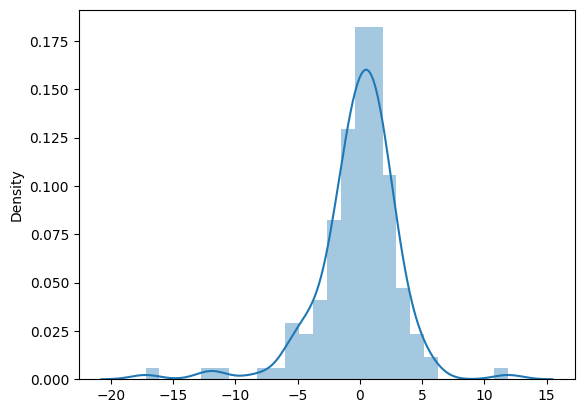

In [28]:
sns.distplot(y_pred_reg.reshape(len(y_pred_reg), 1) - y_test_reg)